In [1]:
import pandas as pd
import numpy as np

In [3]:
housing_data = pd.read_csv('housing.csv')

In [5]:
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing_data.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [7]:
housing_data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

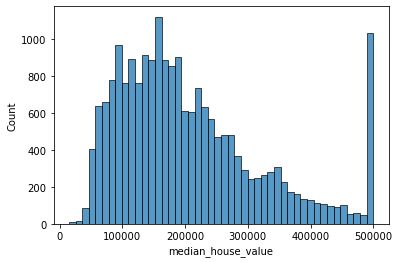

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(housing_data['median_house_value'])

In [13]:
housing_data[housing_data['median_house_value']<500000]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

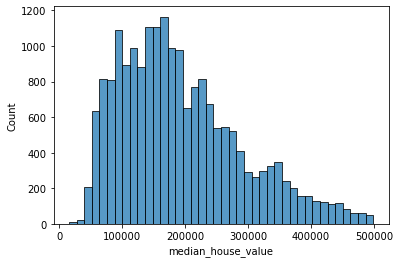

In [21]:
sns.histplot(housing_data.median_house_value[housing_data.median_house_value< 500000], bins =40)

In [15]:
new_housing = housing_data.drop('ocean_proximity', axis = 1)

In [16]:
new_housing['population'].median()

1166.0

In [26]:
log_price = np.log1p(new_housing.median_house_value)

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

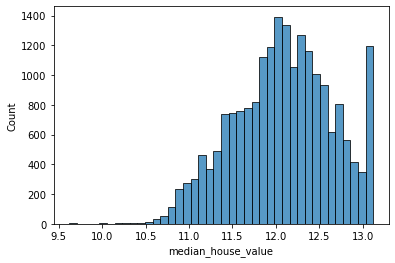

In [28]:
sns.histplot(log_price, bins = 40)

In [29]:
n = len(new_housing)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [30]:
print(n, n_val, n_test, n_train)

20640 4128 4128 12384


In [31]:
df_train = new_housing.iloc[:n_train]
df_val = new_housing.iloc[n_train:n_train+n_val]
df_test = new_housing.iloc[n_train+n_val:]

In [32]:
idx = np.arange(n)

In [33]:
np.random.seed(42)
np.random.shuffle(idx)

In [34]:
df_train = new_housing.iloc[idx[:n_train]]
df_val = new_housing.iloc[idx[n_train:n_train+n_val]]
df_test = new_housing.iloc[idx[n_train+n_val:]]

In [35]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [36]:
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

In [37]:
df_train.drop('median_house_value', axis = 1, inplace  = True)
df_val.drop('median_house_value', axis = 1, inplace  = True)
df_test.drop('median_house_value', axis = 1, inplace  = True)

In [38]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [39]:
df_train.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
dtype: int64

In [40]:
X_train = df_train.fillna(0)

In [41]:
w0, w = train_linear_regression(X_train, y_train)
y_pred = w0 + X_train.dot(w)

<AxesSubplot:ylabel='Count'>

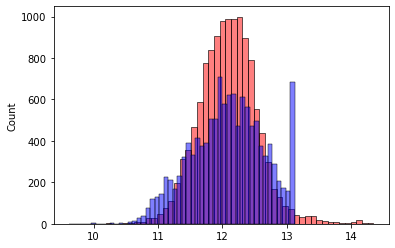

In [42]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

In [43]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [44]:
round(rmse(y_train, y_pred),2)

0.34131359101566733

In [45]:
def prepare_X(df):
    df_num = df.fillna(0)
    X = df_num.values
    return X

In [47]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
round(rmse(y_val, y_pred), 2)

0.33

In [48]:
x_train = df_train.fillna(df_train.mean())

In [49]:
w0, w = train_linear_regression(x_train, y_train)
y_pred = w0 + x_train.dot(w)

In [51]:
round(rmse(y_train, y_pred),2)

0.34

In [52]:
x_train = prepare_X(df_train)
w0, w = train_linear_regression(x_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
round(rmse(y_val, y_pred), 2)

0.33

In [53]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [54]:
new_train = df_train.fillna(0)

In [57]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    X_train = prepare_X(new_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred),2
    
    print(r, w0, score)

0 -11.686975241970226 (0.3295330365229457, 2)
1e-06 -11.686959175950335 (0.32953303616436563, 2)
0.0001 -11.68536886556655 (0.3295330009702536, 2)
0.001 -11.670931318286257 (0.32953270386731864, 2)
0.01 -11.528493586076086 (0.32953193659897706, 2)
0.1 -10.274500282121712 (0.32969472053894056, 2)
1 -4.920480897796898 (0.3337887220006218, 2)
5 -1.482095745685135 (0.33924853455039, 2)
10 -0.7899311832050503 (0.3406063807809088, 2)


In [58]:
np.random.seed(9)
np.random.shuffle(idx)

In [59]:
new_train = new_housing.iloc[idx[:n_train]]
new_val = new_housing.iloc[idx[n_train:n_train+n_val]]
new_test = new_housing.iloc[idx[n_train+n_val:]]

In [62]:
new_val.shape

(4128, 9)

In [60]:
full_train = new_train + new_val

In [63]:
full_train.shape

(16512, 9)

In [66]:
full_y = np.concatenate([y_train, y_val])

In [64]:
full_train = full_train.fillna(0)

In [68]:
X_train = prepare_X(full_train)
w0, w = train_linear_regression_reg(X_train,full_y, r=0.001)

X_test = prepare_X(new_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_val, y_pred)
    
print(r, w0, score)

10 12.08464481112581 0.573706210329341
